# This part 2 of 3 completely TBD very soon

**Other notebooks:** <br>
[Part 1: Data mining and munging](tdp_1_3_data_mining_and_cleaning.ipynb)<br>
[Part 3: Data modeling](tdp_3_3_data_modeling.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()

### Data loading

In [2]:
# Main data for modeling
biker_class = pd.read_csv('preprocessed/biker_class.csv', index_col=0)

# Additional parts for statistics
biker_stats = pd.read_csv('preprocessed/biker_stats.csv', index_col=0)
biker_by_stage = pd.read_csv('preprocessed/biker_by_stage.csv', index_col=0)
stage_results = pd.read_csv('preprocessed/stages.csv', index_col=False)
stage_class = pd.read_csv('preprocessed/stages_summary.csv', index_col=False)

# Statistics

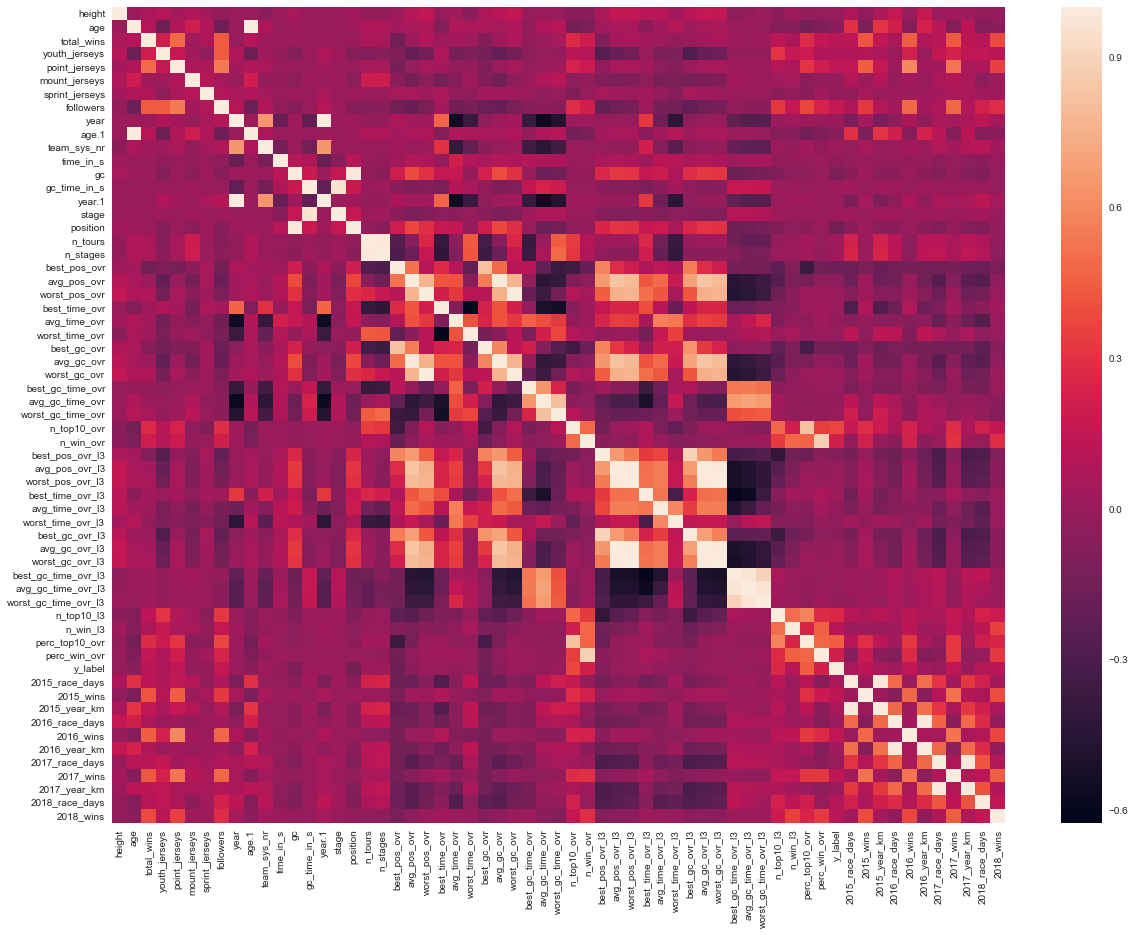

In [3]:
# plot heatmap
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(biker_class.corr(), ax=ax)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90);

In [4]:
biker_class.describe().round(2)

,height,age,total_wins,youth_jerseys,point_jerseys,mount_jerseys,sprint_jerseys,followers,year,age.1,...,2015_wins,2015_year_km,2016_race_days,2016_wins,2016_year_km,2017_race_days,2017_wins,2017_year_km,2018_race_days,2018_wins
count,3156.00,5255.00,5255.00,5255.00,5255.00,5255.00,5255.00,5255.00,5255.00,5255.00,...,5085.00,5085.00,5160.00,5160.00,5160.00,4953.00,4953.00,4953.00,4714.00,4714.00
mean,1.80,28.22,6.06,0.75,0.99,0.64,0.16,2.68,2015.98,28.22,...,0.95,9542.59,59.47,0.71,9313.94,60.05,0.80,9565.76,52.55,0.65
std,0.06,4.24,6.53,1.40,2.42,1.34,0.45,4.37,1.43,4.24,...,1.72,2950.87,17.49,1.50,2840.04,18.07,1.79,3009.35,18.54,1.51
min,1.65,20.00,0.00,0.00,0.00,0.00,0.00,0.00,2014.00,20.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.76,25.00,2.00,0.00,0.00,0.00,0.00,0.00,2015.00,25.00,...,0.00,7783.40,50.00,0.00,7686.80,50.00,0.00,7821.90,43.00,0.00
50%,1.80,28.00,4.00,0.00,0.00,0.00,0.00,1.00,2016.00,28.00,...,0.00,10047.70,62.00,0.00,9743.80,63.00,0.00,9987.70,57.00,0.00
75%,1.84,31.00,8.00,1.00,1.00,1.00,0.00,4.00,2017.00,31.00,...,1.00,11515.50,72.00,1.00,11419.10,73.00,1.00,11912.60,66.00,1.00
max,1.95,44.00,51.00,11.00,36.00,11.00,4.00,52.00,2018.00,44.00,...,16.00,15382.70,92.00,14.00,14675.50,94.00,14.00,15402.50,85.00,16.00


In [5]:
biker_class.describe(include='object')

,name,nation,team,2015_div,2015_fc_rank,2015_team,2015_uci_rank,2016_div,2016_fc_rank,2016_team,2016_uci_rank,2017_div,2017_fc_rank,2017_team,2017_uci_rank,2018_div,2018_fc_rank,2018_team,2018_uci_rank
count,5255,5255,5255,4870,5085,5085,5085,5048,5160,5160,5160,4870,4953,4953,4953,4589,4714,4714,4714
unique,513,44,69,3,373,95,79,3,369,78,79,3,354,77,181,3,330,74,153
top,J.Fröhlinger,Italy,Team Sky,PRT,-,Team Katusha,-,PRT,-,Team Katusha,-,PRT,-,Astana Pro Team,-,PRT,-,Astana Pro Team,-
freq,34,875,250,3332,73,270,3401,3716,168,265,3285,3541,163,270,1838,3219,282,316,2010
